In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

In [34]:
df = pd.read_csv('marketing_campaign.csv', sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Response vs Marital_Status

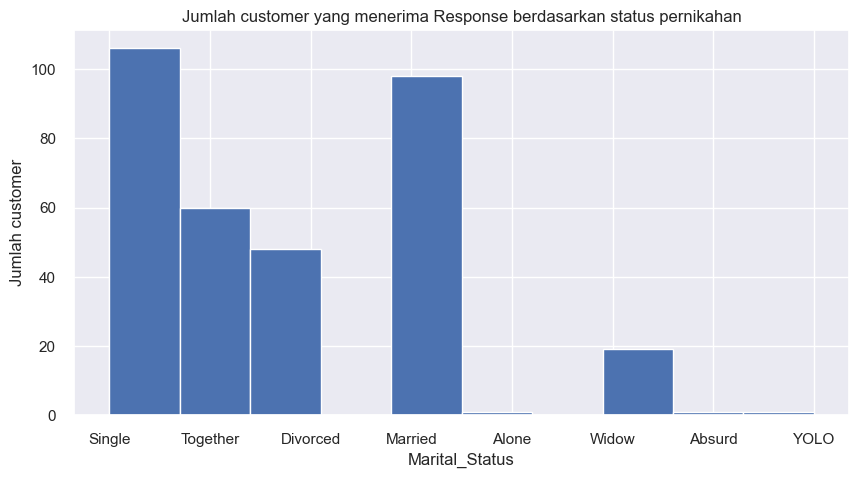

In [35]:
df_resp_yes = df[df['Response'] == 1]

fig = plt.figure(figsize = (10, 5))
plt.hist(data=df_resp_yes, x='Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan status pernikahan')
plt.show()

Jumlah customer paling banyak menerima respon berdasarkan status penikahan yaitu orang yang masih single, sehingga pada campaign selanjutnya perusahaan sebaiknya memfokuskan kepada orang belum menikah (single)

### Response vs Income

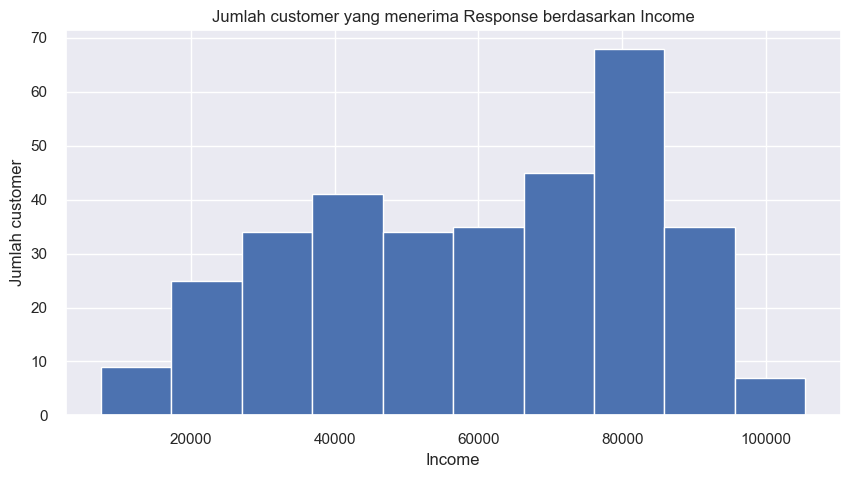

In [36]:
df_resp_yes = df[df['Response'] == 1]

fig = plt.figure(figsize = (10, 5))
plt.hist(data=df_resp_yes, x='Income')
plt.xlabel('Income')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Income')
plt.show()

Jumlah customer paling banyak menerima respon berdasarkan pendapatan yaitu orang-orang yang memilik pendapatan sebesar 80000, sehingga pada campaign selanjutnya perusahaan sebaiknya lebih memfokuskan kepada orang dengan pendapatan 80000 

In [ ]:
df.groupby('Response').agg({'MntWines' : ['count'],
                            'MntFruits' : ['count'],
                            'MntMeatProducts' : ['count'],
                            'MntFishProducts' : ['count'],
                            'MntSweetProducts' : ['count'],
                            'MntGoldProds' : ['count'] })

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
,count,count,count,count,count,count
Response,,,,,,
0,1906,1906,1906,1906,1906,1906
1,334,334,334,334,334,334


Yang ini sebenernya pengen aku buat produk mana yang responnya paling banyak, tapi ternyata sama. Apa ada cara lain ya? wkwk

### Complain vs Purchase Type and Response vs Purchase Type

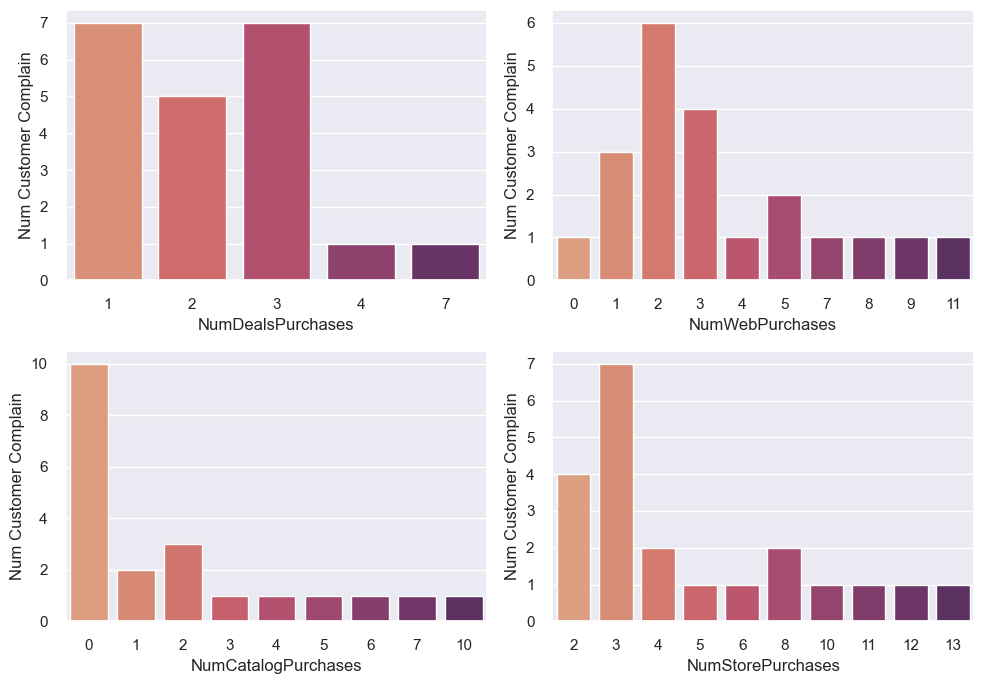

In [39]:
purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_resp_yes = df[df['Complain'] == 1]
    
fig = plt.figure(figsize=(10, 7))
for i in range(0, len(purchase_type)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(data=df_resp_yes, x=purchase_type[i], palette="flare")
    ax.set_xlabel(purchase_type[i])
    ax.set_ylabel('Num Customer Complain')
    plt.tight_layout()

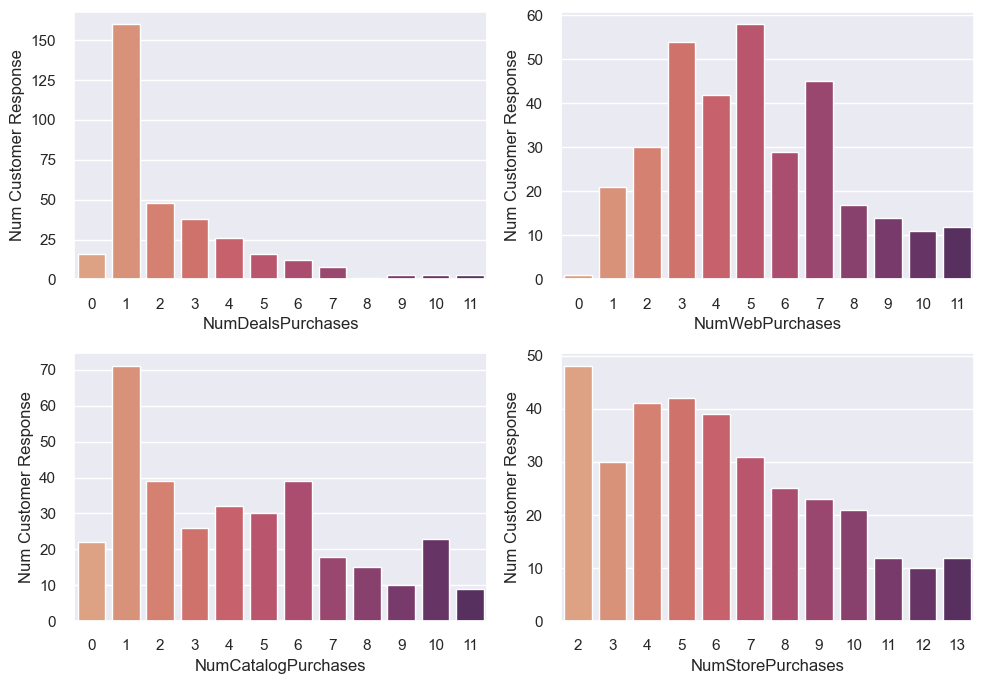

In [30]:
purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_resp_yes = df[df['Response'] == 1]
    
fig = plt.figure(figsize=(10, 7))
for i in range(0, len(purchase_type)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.countplot(data=df_resp_yes, x=purchase_type[i], palette="flare")
    ax.set_xlabel(purchase_type[i])
    ax.set_ylabel('Num Customer Response')
    plt.tight_layout()

Guys kalo dari 2 tabel itu kan keliatan kalo pembelian rendah complainnya makin besar, sedangkan kalo dibandingin sama tingkat responnya justru malah kebalikannya (Semakin sedikit pembelian yang dilakukan baik yang menggunakan diskon ataupun yang melalui web, catalog, store, maka semakin besar kemungkinan customer untuk menerima Response). Bisa gak sih ini dijadiin business insight? Jadi kalo bisa perusahaan fokusnya yang pembelian dikit complainnya juga gak banyak gitu buat campaign marketing berikutnya.